##Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

##Features Description

Customer ID

Gender

Age

Annual Income

Spending Score - Score assigned by the shop, based on customer behavior and spending nature

Profession

Work Experience - in years

Family Size

##1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

##2.Reading and loading the dataset

In [2]:
df=pd.read_csv('/content/customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## 3. Exploratory Data Analysis & Data Visualization

In [4]:
df.shape

(2000, 8)

1. Dataset has 8 features and 2000 tuples.
2. In which 1 is dependent and others are independent features.

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [5]:
df.rename(columns = {'Annual Income ($)':'Annual_Income_($)', 'Spending Score (1-100)':'Spending_Score_(1-100)',
                              'Work Experience':'Work_Experience','Family Size':'Family_Size'}, inplace = True)

In [ ]:
df.sample()

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100),Profession,Work_Experience,Family_Size
1297,1298,Female,83,115517,82,Healthcare,0,6


In [ ]:
len(df) # lenght of the dataframe

2000

In [ ]:
df.count()

CustomerID                2000
Gender                    2000
Age                       2000
Annual_Income_($)         2000
Spending_Score_(1-100)    2000
Profession                1965
Work_Experience           2000
Family_Size               2000
class                     2000
dtype: int64

In [ ]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual_Income_($)          0
Spending_Score_(1-100)     0
Profession                35
Work_Experience            0
Family_Size                0
dtype: int64

1. profession feature has missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual_Income_($)       2000 non-null   int64 
 4   Spending_Score_(1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work_Experience         2000 non-null   int64 
 7   Family_Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


1. Except Gender & profession all features are int type.

In [ ]:
df.describe()

,CustomerID,Age,Annual_Income_($),Spending_Score_(1-100),Work_Experience,Family_Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
df['Spending_Score_(1-100)'].unique()

Insights:

1. The age ranges from 0 to 99.
2. The range of annual incomes is 0 to 189974.00.
3. Spending Score (1-100) minimum: 0 and maximum: 100.0000
4. 0 minimum and 17 maximum years of work experience
5. The smallest family size is 1 and the largest is 9. 
6. The dataset appears to be unbalanced from the example above.

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Profession']= label_encoder.fit_transform(df['Profession'])
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [7]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mean())

In [8]:
df['Profession'] = df['Profession'].map( lambda x : df.Profession.mean() if x == 0 else x)


In [9]:
duplicate = df[df.duplicated()]

In [10]:
duplicate # no duplicates tuples are present in the dataset.

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100),Profession,Work_Experience,Family_Size


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd26833280>,
      dtype=object)

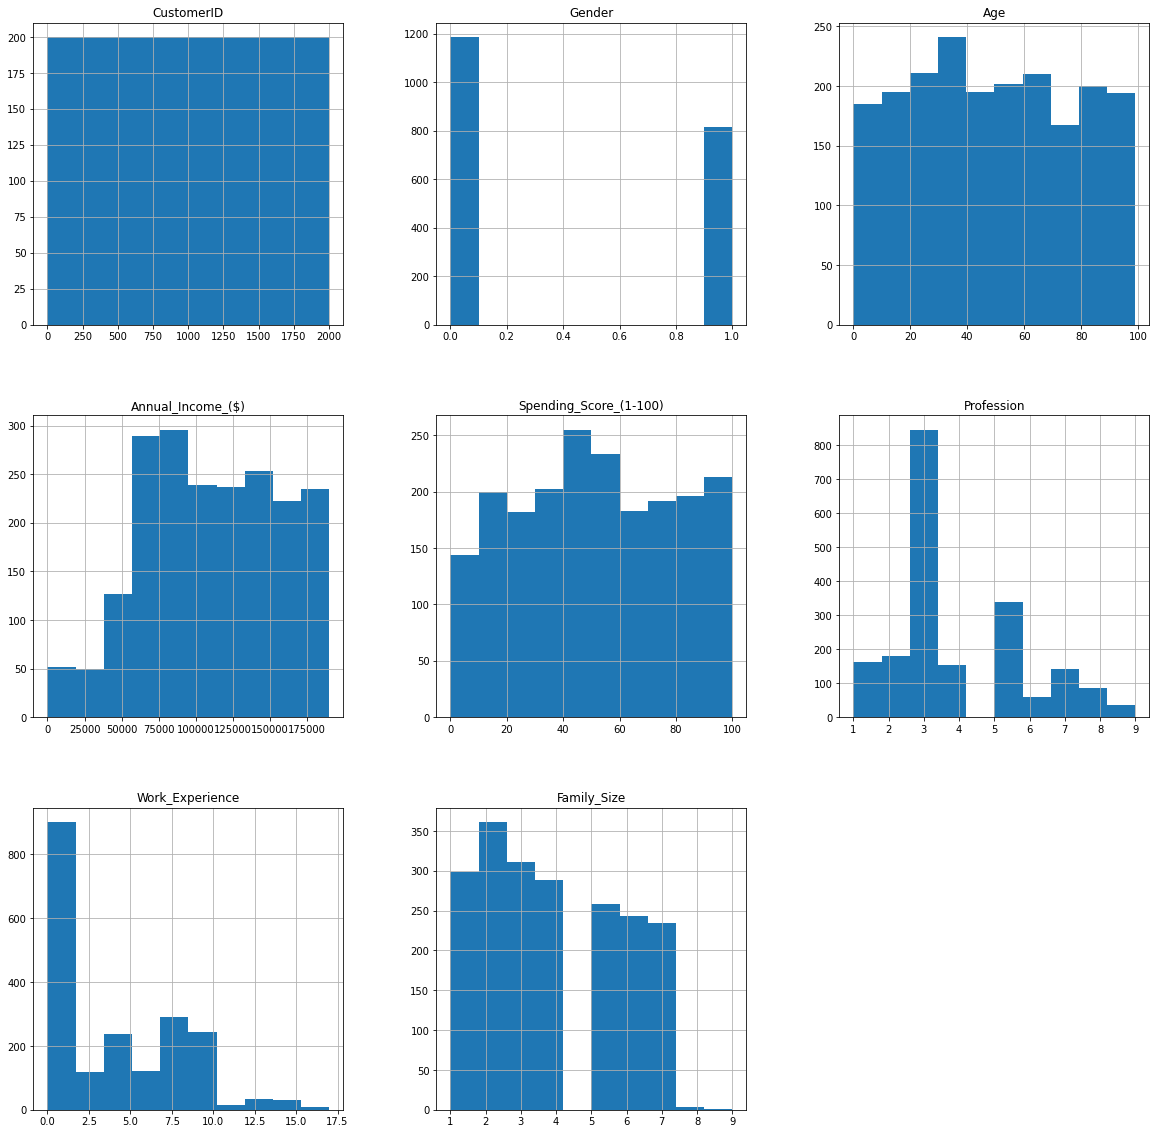

In [11]:
df.hist(figsize=(20,20))

Insights:
1. Right-skewed data set.
2. The range of the maximum annual income is $50,000 to $1,000,000
3. We are not finding anything from the customer id, hence we will remove the customer id option.

4. Distribution of gender is binary.
5. The maximum customer has no job experience, as indicated by the value of work exp being 0.00.
6. Maximum data in family size is between 1 and 4.
7. The bulk of consumers score between 40 and 60.
8. Maximum count in age ranges between 2 to 40.

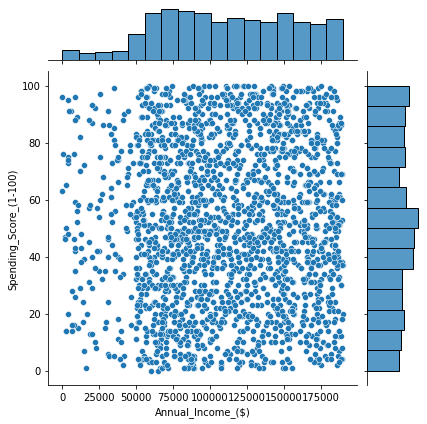

In [ ]:
sn.jointplot(x="Annual_Income_($)", y ="Spending_Score_(1-100)",data=df)

Insights:

1. The customer's spending score is from 38 to 55 and their annual income is between $50,000 and $1,000,000.

([<matplotlib.patches.Wedge at 0x7f3ae91bcaf0>,
 [Text(-0.3168320322582617, 1.053383815774241, '1'),
  Text(0.31683203225826206, -1.0533838157742408, '0')],
 [Text(-0.17281747214086998, 0.5745729904223131, '59.30%'),
  Text(0.1728174721408702, -0.5745729904223131, '40.70%')])

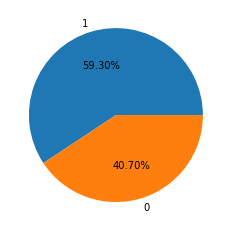

In [ ]:
y_name=df.Gender.value_counts().index
y_val=df.Gender.value_counts().values
plt.pie(y_val,labels=y_name,autopct='%1.2f%%')

Insights:

1.majority of female customers are present in the dataset by 59.30% camparetively Male customers by 40.70%.

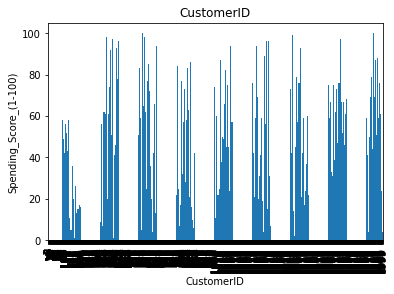

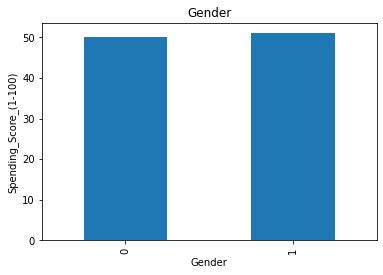

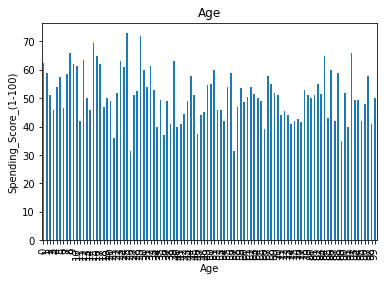

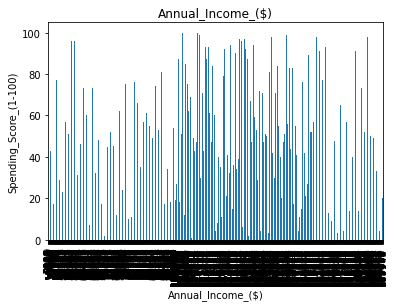

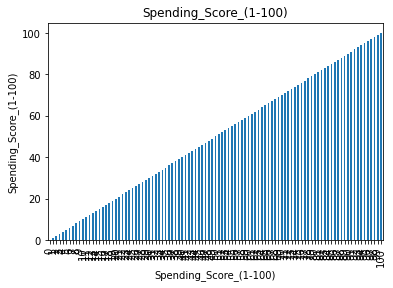

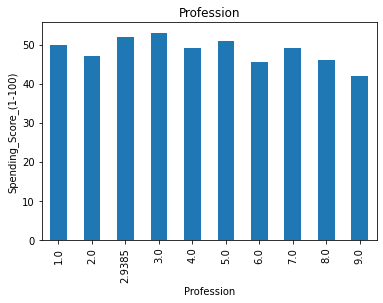

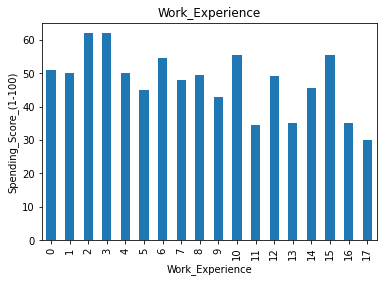

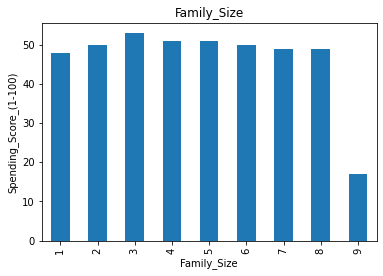

In [ ]:
for feature in df:
    df.groupby(feature)['Spending_Score_(1-100)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Spending_Score_(1-100)')
    plt.title(feature)
    plt.show()

Insights:



1. The spending score of the entertainment(3) industry's maximum consumers is 56.

2. Customers with between 2 and 3 years of job experience have a spending score of 65.

3. A family size of three contributes the most to the spending score, which is 55.

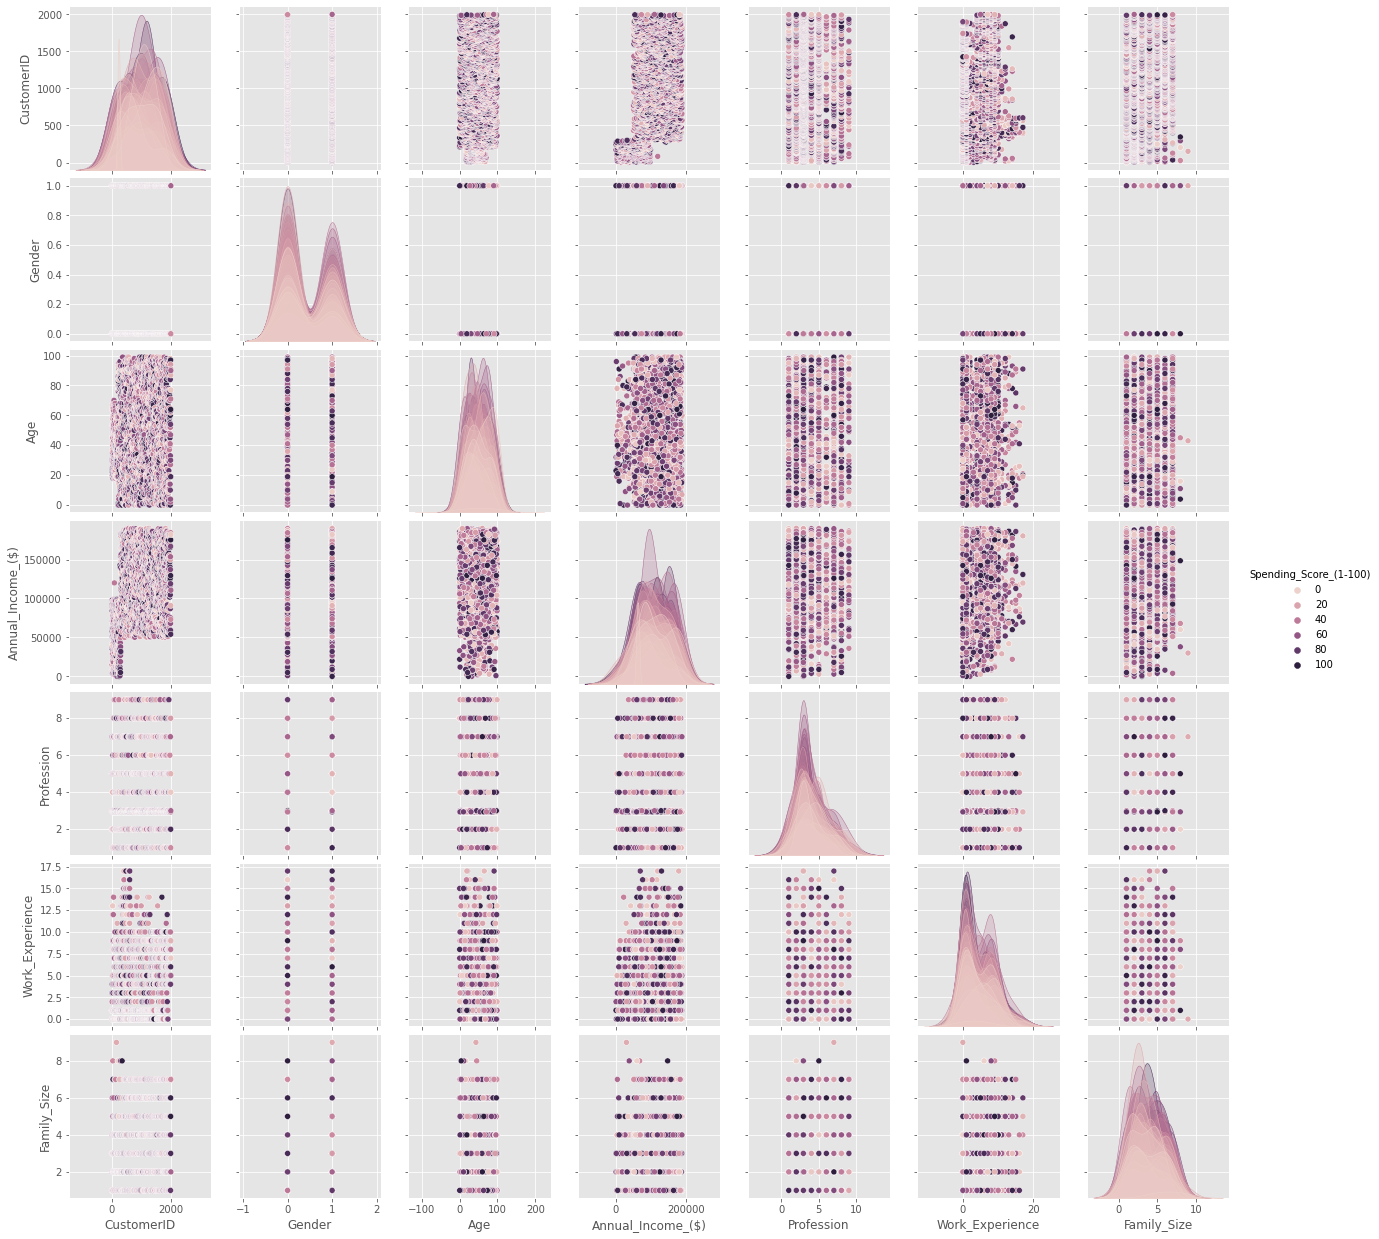

In [ ]:
sn.pairplot(df, hue='Spending_Score_(1-100)')

Insights:

1.We can observe from the above pair plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. 

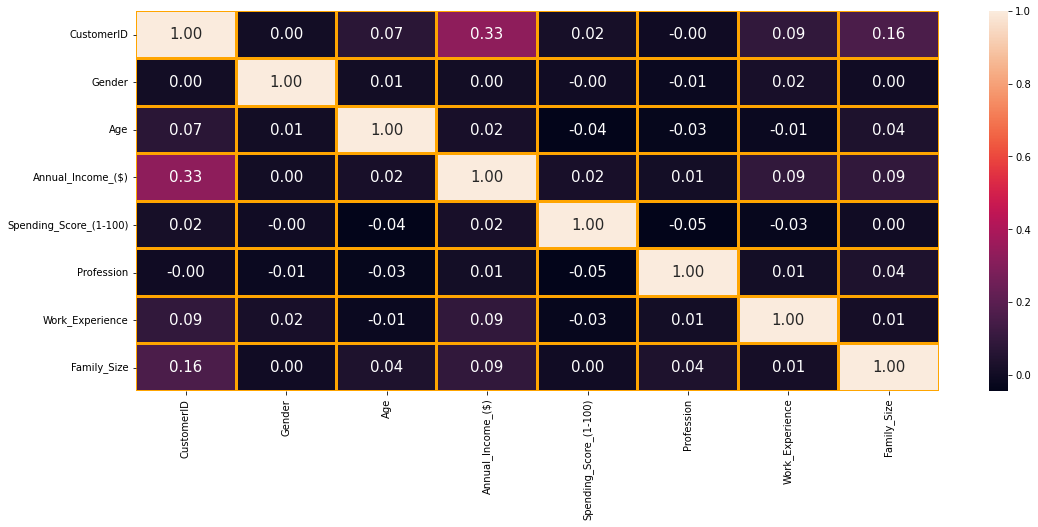

In [ ]:
plt.figure(figsize = (18, 7))
sn.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

##4. Data Pre-Processing / Data Cleaning

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_($)',
       'Spending_Score_(1-100)', 'Profession', 'Work_Experience',
       'Family_Size'],
      dtype='object')

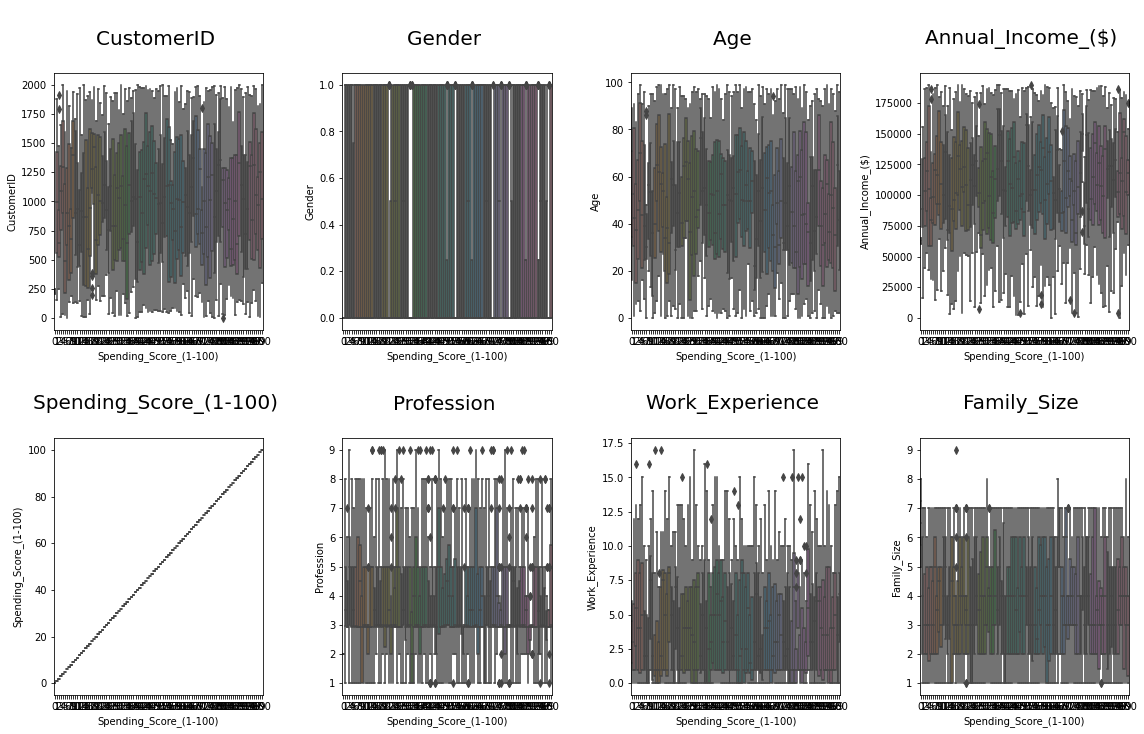

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sn.boxplot(x='Spending_Score_(1-100)',y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Spending_Score_(1-100)',axis=1)) 
scaled_features = scaler.transform(df.drop('Spending_Score_(1-100)',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat['Spending_Score_(1-100)']= df['Spending_Score_(1-100)']

In [13]:

df_feat

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100),Profession,Work_Experience
0,-1.731185,1.207064,-1.054089,-2.093501,39,-0.791207,0.117497
1,-1.729453,1.207064,-0.983723,-1.656133,81,-0.281162,-0.390051
2,-1.727721,-0.828457,-1.018906,-0.540845,6,-0.791207,-1.405148
3,-1.725989,-0.828457,-0.913356,-1.131292,77,-1.046230,-0.897599
4,-1.724257,-0.828457,-0.631891,-1.590528,40,-0.536185,1.132594
...,...,...,...,...,...,...,...
1995,1.724257,-0.828457,0.775438,1.610720,40,0.993950,1.640142
1996,1.725989,-0.828457,1.479103,-0.821679,32,0.738928,1.640142
1997,1.727721,1.207064,1.338370,-0.432356,14,1.248972,-0.897599
1998,1.729453,1.207064,0.986538,1.560904,4,0.738928,-0.897599


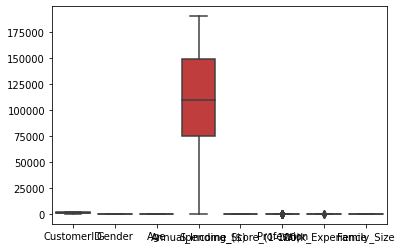

In [14]:
plt.figsize=(20,20)
sn.boxplot(data=df)

In [15]:
df.drop('CustomerID',axis=1,inplace=True)

In [16]:
df.sample()

,Gender,Age,Annual_Income_($),Spending_Score_(1-100),Profession,Work_Experience,Family_Size
702,1,41,113998,26,5.0,7,7


# Decide Dependant and Independant Elements in Data Set

In [19]:
x=df.drop('Spending_Score_(1-100)',axis=1)

In [20]:
y=df['Spending_Score_(1-100)']

##Train_test_split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_train = [1 if value>50 else 0 for value in y_train]
y_train[:5]

In [ ]:
y_test=[1 if value>50 else 0 for value in y_test]
y_test[:5]

In [27]:
from sklearn.svm import SVC
algo = SVC()
algo.fit(x_train,y_train)
predicts = algo.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicts))
print(classification_report(y_test,predicts))

[[55 47]
 [52 46]]
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       102
           1       0.49      0.47      0.48        98

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200

